In [2]:
# implementation of basic K-means clustering algorithm using Python in jupyter notebook
# Student Name: Gargi Darade
# Subject/Class: CMPS 451 Artificial Intelligence

#Step 1:- Import the required libraries
#Numpy for statistical computations
#Matplotlib to plot the graph 
#make_blobs from sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

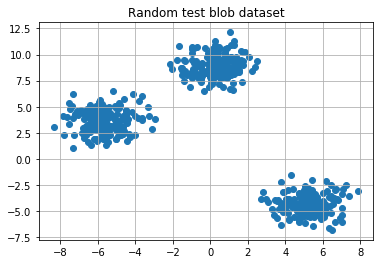

In [4]:
#Step 2:- Create the custom test dataset with make_blobs and plot it
X,y = make_blobs(n_samples = 550,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.title("Random test blob dataset")
plt.show()


In [5]:
#Step 3: Initialize the random centroids
#initializes 3 clusters for K-means
#sets a random seed
#generates random cluster centers within a specified range
#creates an empty list of points for each cluster.
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

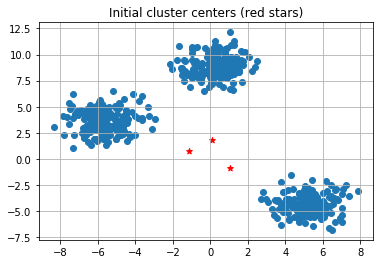

In [7]:
#Step 4: Plot the random initialize center with data points
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.title("Initial cluster centers (red stars)")
plt.show()


In [8]:
#Step 5: Define Euclidean distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


In [9]:
#Step 6: the function to Assign and Update the cluster center
#This step assigns data points to the nearest cluster center,
# and the M-step updates cluster centers based on the mean of assigned points in K-means clustering.

def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters


In [10]:
#Step 7: the function to Predict the cluster for the datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred   


In [11]:
#Step 8: Assign, Update, and predict the cluster center
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


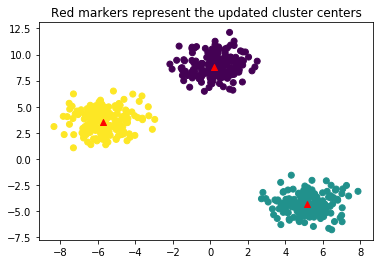

In [13]:
#Step 9: Plot the data points with their predicted cluster center
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.title("Red markers represent the updated cluster centers")
plt.show()
